#### PA analyze

- [Postion Angle Source Code](https://www-astro.physics.ox.ac.uk/~mxc/software/#pafit)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from marvin import config
config.setDR('DR16')

from marvin.tools.maps import Maps
from fit_kinematic_pa import *

MaNGA-ID 1-113520 GAS PA


[WARNING]: Trying to register the cmap 'sauron' which already exists. (UserWarning)
[WARNING]: Trying to register the cmap 'sauron_r' which already exists. (UserWarning)


  Kin PA:   1.5  +/-   3.0  (3*sigma error)
Velocity Offset: 0.00
MaNGA-ID 1-113520 Stellar PA


[WARNING]: Trying to register the cmap 'sauron' which already exists. (UserWarning)
[WARNING]: Trying to register the cmap 'sauron_r' which already exists. (UserWarning)
[WARNING]: Trying to register the cmap 'sauron' which already exists. (UserWarning)
[WARNING]: Trying to register the cmap 'sauron_r' which already exists. (UserWarning)


  Kin PA:  66.5  +/-  38.2  (3*sigma error)
Velocity Offset: 0.00
MaNGA-ID 1-38618 GAS PA


[WARNING]: Trying to register the cmap 'sauron' which already exists. (UserWarning)
[WARNING]: Trying to register the cmap 'sauron_r' which already exists. (UserWarning)
[WARNING]: Trying to register the cmap 'sauron' which already exists. (UserWarning)
[WARNING]: Trying to register the cmap 'sauron_r' which already exists. (UserWarning)


  Kin PA: 139.0  +/-  11.0  (3*sigma error)
Velocity Offset: 0.00
MaNGA-ID 1-38618 Stellar PA


[WARNING]: Trying to register the cmap 'sauron' which already exists. (UserWarning)
[WARNING]: Trying to register the cmap 'sauron_r' which already exists. (UserWarning)
[WARNING]: Trying to register the cmap 'sauron' which already exists. (UserWarning)
[WARNING]: Trying to register the cmap 'sauron_r' which already exists. (UserWarning)


  Kin PA:  43.5  +/-  16.8  (3*sigma error)
Velocity Offset: 0.00
MaNGA-ID 1-38510 GAS PA


[WARNING]: Trying to register the cmap 'sauron' which already exists. (UserWarning)
[WARNING]: Trying to register the cmap 'sauron_r' which already exists. (UserWarning)
[WARNING]: Trying to register the cmap 'sauron' which already exists. (UserWarning)
[WARNING]: Trying to register the cmap 'sauron_r' which already exists. (UserWarning)


  Kin PA:  18.0  +/-   0.5  (3*sigma error)
Velocity Offset: 0.00
MaNGA-ID 1-38510 Stellar PA


[WARNING]: Trying to register the cmap 'sauron' which already exists. (UserWarning)
[WARNING]: Trying to register the cmap 'sauron_r' which already exists. (UserWarning)
[WARNING]: Trying to register the cmap 'sauron' which already exists. (UserWarning)
[WARNING]: Trying to register the cmap 'sauron_r' which already exists. (UserWarning)


  Kin PA:  88.0  +/-  10.8  (3*sigma error)
Velocity Offset: 0.00
MaNGA-ID 1-96154 GAS PA


[WARNING]: Trying to register the cmap 'sauron' which already exists. (UserWarning)
[WARNING]: Trying to register the cmap 'sauron_r' which already exists. (UserWarning)
[WARNING]: Trying to register the cmap 'sauron' which already exists. (UserWarning)
[WARNING]: Trying to register the cmap 'sauron_r' which already exists. (UserWarning)


  Kin PA:  53.5  +/-   0.5  (3*sigma error)
Velocity Offset: 0.00
MaNGA-ID 1-96154 Stellar PA


[WARNING]: Trying to register the cmap 'sauron' which already exists. (UserWarning)
[WARNING]: Trying to register the cmap 'sauron_r' which already exists. (UserWarning)
[WARNING]: Trying to register the cmap 'sauron' which already exists. (UserWarning)
[WARNING]: Trying to register the cmap 'sauron_r' which already exists. (UserWarning)


  Kin PA:  47.0  +/-   7.0  (3*sigma error)
Velocity Offset: 0.00


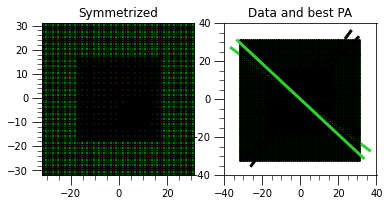

In [8]:

mangaids = ['1-113520', '1-38618', '1-38510', '1-96154']

for mangaid in mangaids:
    
    maps = Maps(mangaid=mangaid, mode='local')
    h_alpha_vel_maps = maps['emline_gvel_ha_6564']
    nii_vel_maps = maps['emline_gvel_nii_6585']
    stellar_sigma_maps = maps['stellar_vel']

    ionized_gas = (h_alpha_vel_maps.value + nii_vel_maps.value)/2
    x_length, y_length = ionized_gas.shape
    x_center = int(x_length / 2)
    y_center = int(y_length / 2)

    x = []
    y = []
    for row in range(x_length-1,-1,-1):
        for col in range(0, y_length):
            x.append(col - y_center)
            y.append(row - x_center)

    vel = ionized_gas.flatten()
    print('MaNGA-ID', mangaid, 'GAS PA')
    fit_kinematic_pa(x,y,vel)

    print('MaNGA-ID', mangaid, 'Stellar PA')
    vel = stellar_sigma_maps.value.flatten()
    fit_kinematic_pa(x,y,vel)